In [ ]:
#khoi tao

import  numpy as np
import matplotlib.pyplot as plt


# thiep lap input layer
x_input=np.array([[0,0,1,1],[0,1,0,1]])
m = x_input.shape[1]
# tốc độ học tập
lr=0.2
# thie lap outputlayer 
y_output=np.array([[0,0,0,1]]) 
'''and'''
'''y_output=np.array([[0,1,1,1]]])  OR'''
'''y_output=np.array([[0,1,1,1]]])  XOR'''
# thiep lap so neural o input
n_x = 2
# thiet lap so neural o outputlayer
n_y = 1
# se co 3 lop hiden
n_h1 = 5
n_h2 = 4
n_h3 = 3

np.random.seed(2)
#se co 4 weith ta chon bua tham so cho no
w1 = np.random.rand(n_h1,n_x)
w2 = np.random.rand(n_h2,n_h1)
w3 = np.random.rand(n_h3,n_h2)
w4 = np.random.rand(n_y,n_h3)
#luu looses function
losses = []

print(w3)

[[0.46778748 0.20174323 0.64040673 0.48306984]
 [0.50523672 0.38689265 0.79363745 0.58000418]
 [0.1622986  0.70075235 0.96455108 0.50000836]]


Bây giờ đến phần hàm:: ở đây tôi dùng hàm sigmoid


In [ ]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z
def forward_prop(w1,w2,w3,w4,x_input):
  z1=np.dot(w1,x_input)
  a1=sigmoid(z1)
  z2=np.dot(w2,a1)
  a2=sigmoid(z2)
  z3=np.dot(w3,a2)
  a3=sigmoid(z3)
  z4=np.dot(w4,a3)
  a4=sigmoid(z4)
  return z1,a1,z2,a2,z3,a3,z4,a4
def back_prop(w1,w2,w3,w4,z1,a1,z2,a2,z3,a3,z4,a4,y_output):
  dz4 = a4-y_output
  dw4 = np.dot(dz4,a3.T)/m
  dz3 = np.dot(w4.T,dz4) * a3*(1-a3)
  dw3 = np.dot(dz3,a2.T)/m
  dz2 = np.dot(w3.T,dz3) * a2*(1-a2)
  dw2 = np.dot(dz2,a1.T)/m
  dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
  dw1 = np.dot(dz1,x_input.T)/m

  dw1 = np.reshape(dw1,w1.shape)
  dw2 = np.reshape(dw2,w2.shape) 
  dw3 = np.reshape(dw3,w3.shape)
  dw4 = np.reshape(dw4,w4.shape)
  return dz4,dw4,dz3,dw3,dz2,dw2,dz1,dw1

Tiếp theo đến quá trình training

[[3.13768199e-04 1.27259271e-03 1.75106796e-03 9.92642097e-01]]


Text(0, 0.5, 'Loss xor')

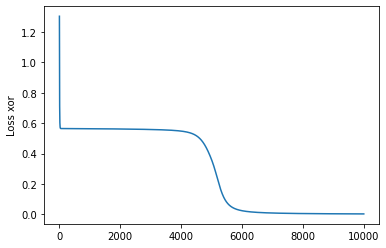

In [ ]:
iterations = 10000
for i in range(iterations):
  z1,a1,z2,a2,z3,a3,z4,a4 = forward_prop(w1,w2,w3,w4,x_input)
  loss = -(1/m)*np.sum(y_output*np.log(a4)+(1-y_output)*np.log(1-a4))
  losses.append(loss)
  dz4,dw4,dz3,dw3,dz2,dw2,dz1,dw1 = back_prop(w1,w2,w3,w4,z1,a1,z2,a2,z3,a3,z4,a4,y_output)
  w2 = w2-lr*dw2
  w1 = w1-lr*dw1
  w3 = w3-lr*dw3
  w4 = w4-lr*dw4
print(a4 )
plt.plot(losses)

plt.ylabel("Loss xor")


tiếp theo tới quá trình test:

In [ ]:
def predict(w1,w2,w3,w4,input):
  z1,a1,z2,a2,z3,a3,z4,a4 = forward_prop(w1,w2,w3,w4,test);
  a4 = np.squeeze(a4)
  if a4>=0.5:
      print(" Đầu vào ", [i[0] for i in input], "đầu ra 1")
  else:
      print(" Đầu vào ", [i[0] for i in input], "đầu ra 0")

test = np.array([[1],[0]])
predict(w1,w2,w3,w4,test)
test = np.array([[0],[0]])
predict(w1,w2,w3,w4,test)
test = np.array([[0],[1]])
predict(w1,w2,w3,w4,test)
test = np.array([[1],[1]])
predict(w1,w2,w3,w4,test)


 Đầu vào  [1, 0] đầu ra 0
 Đầu vào  [0, 0] đầu ra 0
 Đầu vào  [0, 1] đầu ra 0
 Đầu vào  [1, 1] đầu ra 1
